In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

df = pd.read_csv('./data/act_train.csv')
df_people = pd.read_csv('./data/people.csv')
df_merge = pd.merge(df, df_people, how='inner', on='people_id')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [12]:
dfy = pd.DataFrame(df_merge, columns=['outcome']).copy()
dfX = df_merge.drop('outcome', axis=1).copy()

In [9]:
df.tail(4)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 199,1
2197290,ppl_99994,act2_715089,2023-06-15,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [ ]:
df['activity_category'].value_counts()

In [ ]:
df_act1 = df[df.activity_id.str.contains('^act1')].copy()
df_act2 = df[df.activity_id.str.contains('^act2')].copy()

In [ ]:
df_act1_type1 = df_act1[df_act1['activity_category']=='type 1'][['people_id', 'activity_id', 'date', 'activity_category', 'char_1', 
                                                                 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 
                                                                 'char_9', 'outcome']].copy()

In [ ]:
df_act2_type1 = df_act2[df_act2['activity_category']=='type 1'][['people_id', 'activity_id', 'date', 'activity_category', 'char_1', 
                                                                 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 
                                                                 'char_9', 'outcome']].copy()

In [ ]:
df_act1_type1.tail() #activity_category : type 1

In [ ]:
df_act2_type2 = df_act2[df_act2['activity_category']=='type 2'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()
df_act2_type3 = df_act2[df_act2['activity_category']=='type 3'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()
df_act2_type4 = df_act2[df_act2['activity_category']=='type 4'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()
df_act2_type5 = df_act2[df_act2['activity_category']=='type 5'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()
df_act2_type6 = df_act2[df_act2['activity_category']=='type 6'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()
df_act2_type7 = df_act2[df_act2['activity_category']=='type 7'][['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']].copy()

In [ ]:
df_act2_type1 # 없음

In [ ]:
df_act2_type2['char_10'].value_counts()

In [ ]:
df_act2_type2.head() #type 1    904683

In [ ]:
df_act2_type3['char_10'].value_counts() # 450

In [ ]:
df_act2_type3.tail()

In [ ]:
df_act2_type4['char_10'].value_counts() # 3315

In [ ]:
df_act2_type5['char_10'].value_counts() # 2747

In [ ]:
df_act2_type6['char_10'].value_counts() # type 110    4253

In [ ]:
df_act2_type6.tail()

In [ ]:
df_act2_type7['char_10'].value_counts() # type 194    3157

In [ ]:
plt.scatter(df_merge['char_38'],df_merge['outcome'],alpha=0.1)
plt.show()

In [ ]:
# df_test = df_merge[['people_id', 'outcome', 'char_38']].drop_duplicates() 쓰면 안된!!!

# feature corr

In [2]:
a = df_merge.sample(frac = 0.1).copy()

In [3]:
a = a.replace('type ', '', regex=True).apply(pd.to_numeric, errors='ignore')

In [6]:
# a.dtypes

people_id             object
activity_id           object
date_x                object
activity_category      int64
char_1_x             float64
char_2_x             float64
char_3_x             float64
char_4_x             float64
char_5_x             float64
char_6_x             float64
char_7_x             float64
char_8_x             float64
char_9_x             float64
char_10_x            float64
outcome                int64
char_1_y               int64
group_1               object
char_2_y               int64
date_y                object
char_3_y               int64
char_4_y               int64
char_5_y               int64
char_6_y               int64
char_7_y               int64
char_8_y               int64
                      ...   
char_14                 bool
char_15                 bool
char_16                 bool
char_17                 bool
char_18                 bool
char_19                 bool
char_20                 bool
char_21                 bool
char_22       

In [15]:
a.head()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,char_2_y,date_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
51032,ppl_105739,act2_2675898,2022-09-30,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0,2,group 17304,2,2021-02-27,40,25,9,3,9,3,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
633148,ppl_205929,act1_281441,2022-09-14,1,2.0,5.0,5.0,3.0,6.0,1.0,1.0,4.0,8.0,NaN,1,2,group 14289,3,2022-08-27,15,5,5,1,2,2,4,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,90
916176,ppl_255310,act2_2175755,2023-07-26,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2,group 8456,3,2023-05-09,4,6,4,3,8,3,3,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,True,True,47
928249,ppl_257039,act2_3052448,2022-11-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,group 17304,2,2022-09-01,40,25,9,3,8,3,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1013416,ppl_271680,act2_2780333,2022-08-06,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2,group 29098,3,2022-04-01,11,15,2,3,9,3,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,66


In [19]:
a.columns

Index(['people_id', 'activity_id', 'date_x', 'activity_category', 'char_1_x',
       'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x',
       'char_8_x', 'char_9_x', 'char_10_x', 'outcome', 'char_1_y', 'group_1',
       'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38'],
      dtype='object')

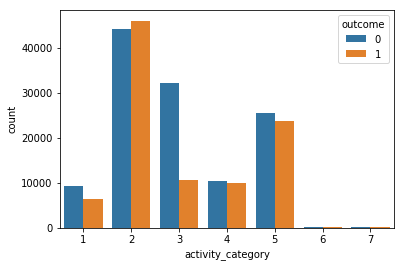

In [7]:
sns.countplot(x='activity_category',hue = 'outcome', data = a)
plt.show()

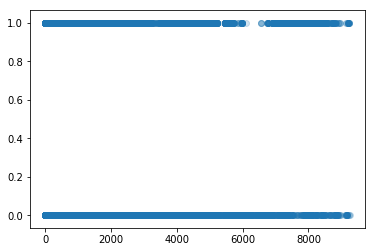

In [33]:
plt.scatter(a[['char_10_x']],a['outcome'],alpha=0.1)
plt.show()

In [ ]:
sns.pairplot(a)
plt.show()

In [ ]:
sns.distplot(a, kde=True, rug=True)
plt.show()